In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

In [2]:
from google.colab import drive

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
paths=glob.glob('/gdrive/My Drive/hindi_plates/*.jpg')

In [12]:
len(paths)

2

In [14]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape


<ipython-input-14-8b61a7ae7bb5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orig = np.array([np.asarray(Image.open(img)) for img in paths])


(2,)

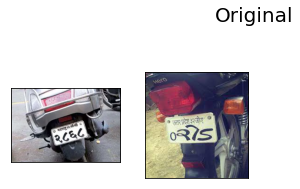

In [15]:
plt.figure(figsize=(9,9))
i = 0
for img in orig[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Original", fontsize=20)
plt.show()

In [16]:
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]

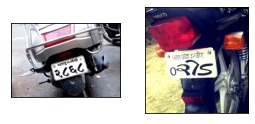

In [17]:
plt.figure(figsize=(9,9))
i = 0
for img in contrast[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [25]:
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

In [22]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]
plt.show()

In [20]:
rotate = [Image.fromarray(img, 'RGB').rotate(np.random.choice([0, 90, 180, 270])) for img in flip]

In [ ]:
import os
for i, image in tqdm(enumerate(rotate)):
    directory = paths[i].rsplit('/', 3)[0] + '/augmented/' + paths[i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    image.save(directory + paths[i].rsplit('/', 2)[2])